In [29]:
from pathlib import Path
import pandas as pd
from gwosc.datasets import event_gps
from gwpy.timeseries import TimeSeries
from gwpy.time import from_gps
import matplotlib.pyplot as plt
import h5py 
import numpy as np
from tqdm import tqdm

DATA = Path("../data/gravity_spy")
DATASET_PATH = DATA / "trainingsetv1d0.h5"
METADATA_PATH = DATA / "trainingset_v1d0_metadata.csv"

In [30]:
with h5py.File(DATASET_PATH, 'r') as f:
    names_classes = list(f.keys())
    num_classes = len(names_classes)
    splits = list(f[names_classes[0]].keys())
    file_name_test = list(f[names_classes[0]][splits[0]].keys())[0]
    test = f[names_classes[0]][splits[0]][file_name_test]
    resolutions = list(test)
dataset = pd.read_csv(METADATA_PATH)
class_counts = [sum(dataset["label"]==glitch) for glitch in names_classes]

  1%|          | 56/8583 [00:00<00:30, 276.64it/s]

100%|██████████| 8583/8583 [00:17<00:00, 504.28it/s]


(6008, 1, 140, 170)


Text(0.5, 1.0, '1080Lines')

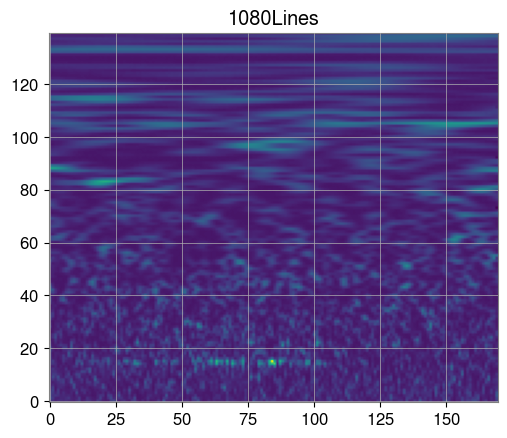

In [37]:
datas05 = {"train":[],
           "validation":[],
           "test":[]}

datas10 = []
datas20 = {"train":[],
           "validation":[],
           "test":[]}
datas40 = []

labels = {"train":[],
          "validation":[],
          "test":[]}

data = datas20

with h5py.File(DATASET_PATH, 'r') as f:
    for i in tqdm(range(len(dataset))):
        id = dataset["gravityspy_id"][i]
        split = dataset["sample_type"][i]
        label = dataset["label"][i]

        labels[split].append(names_classes.index(label))
        data[split].append(np.array(f[label][split][id][resolutions[2]]))

X_train = np.array(data["train"])
y_train = np.array(labels["train"])

X_val = np.array(data["validation"])
y_val = np.array(labels["validation"])

X_test = np.array(data["test"])
y_test = np.array(labels["test"])

test_i = 29
print(X_train.shape)
test_im = X_train[test_i,0,:,:]
test_label = y_train[test_i]
height, width = test_im.squeeze().shape
plt.imshow(test_im.squeeze(), origin="lower")
plt.title(names_classes[test_label])

In [40]:
train_class_counts = [sum(y_train==glitch) for glitch in range(len(names_classes))] 
val_class_counts = [sum(y_val==glitch) for glitch in range(len(names_classes))] 
test_class_counts = [sum(y_test==glitch) for glitch in range(len(names_classes))] 

In [41]:
# Create the LaTeX table
def generate_latex_table(classes, train_samples, val_samples, test_samples):
    table = r"\begin{table}[h!]" + "\n"
    table += r"\centering" + "\n"
    table += r"\begin{tabular}{|l|c|c|c|}" + "\n"
    table += r"\hline" + "\n"
    table += r"Class & Train & Validation & Test \\" + "\n"
    table += r"\hline" + "\n"

    for cls, train, val, test in zip(classes, train_samples, val_samples, test_samples):
        table += f"{cls} & {train} & {val} & {test} \\\\" + "\n"
        table += r"\hline" + "\n"

    table += r"\end{tabular}" + "\n"
    table += r"\caption{Sample distribution across Train, Validation, and Test sets}" + "\n"
    table += r"\label{table:sample_distribution}" + "\n"
    table += r"\end{table}"

    return table

# Generate and print the LaTeX table
latex_table = generate_latex_table(names_classes, train_class_counts, val_class_counts, test_class_counts)
print(latex_table)


\begin{table}[h!]
\centering
\begin{tabular}{|l|c|c|c|}
\hline
Class & Train & Validation & Test \\
\hline
1080Lines & 230 & 49 & 49 \\
\hline
1400Ripples & 162 & 35 & 35 \\
\hline
Air_Compressor & 41 & 8 & 9 \\
\hline
Blip & 1308 & 281 & 280 \\
\hline
Chirp & 46 & 10 & 10 \\
\hline
Extremely_Loud & 318 & 68 & 68 \\
\hline
Helix & 195 & 42 & 42 \\
\hline
Koi_Fish & 581 & 125 & 124 \\
\hline
Light_Modulation & 401 & 86 & 86 \\
\hline
Low_Frequency_Burst & 460 & 99 & 98 \\
\hline
Low_Frequency_Lines & 317 & 68 & 68 \\
\hline
No_Glitch & 127 & 27 & 27 \\
\hline
None_of_the_Above & 62 & 13 & 13 \\
\hline
Paired_Doves & 19 & 4 & 4 \\
\hline
Power_Line & 317 & 68 & 68 \\
\hline
Repeating_Blips & 200 & 43 & 42 \\
\hline
Scattered_Light & 321 & 69 & 69 \\
\hline
Scratchy & 248 & 53 & 53 \\
\hline
Tomte & 81 & 17 & 18 \\
\hline
Violin_Mode & 330 & 71 & 71 \\
\hline
Wandering_Line & 31 & 6 & 7 \\
\hline
Whistle & 213 & 46 & 46 \\
\hline
\end{tabular}
\caption{Sample distribution across Train, Va

Keys: <KeysViewHDF5 ['1080Lines', '1400Ripples', 'Air_Compressor', 'Blip', 'Chirp', 'Extremely_Loud', 'Helix', 'Koi_Fish', 'Light_Modulation', 'Low_Frequency_Burst', 'Low_Frequency_Lines', 'No_Glitch', 'None_of_the_Above', 'Paired_Doves', 'Power_Line', 'Repeating_Blips', 'Scattered_Light', 'Scratchy', 'Tomte', 'Violin_Mode', 'Wandering_Line', 'Whistle']>


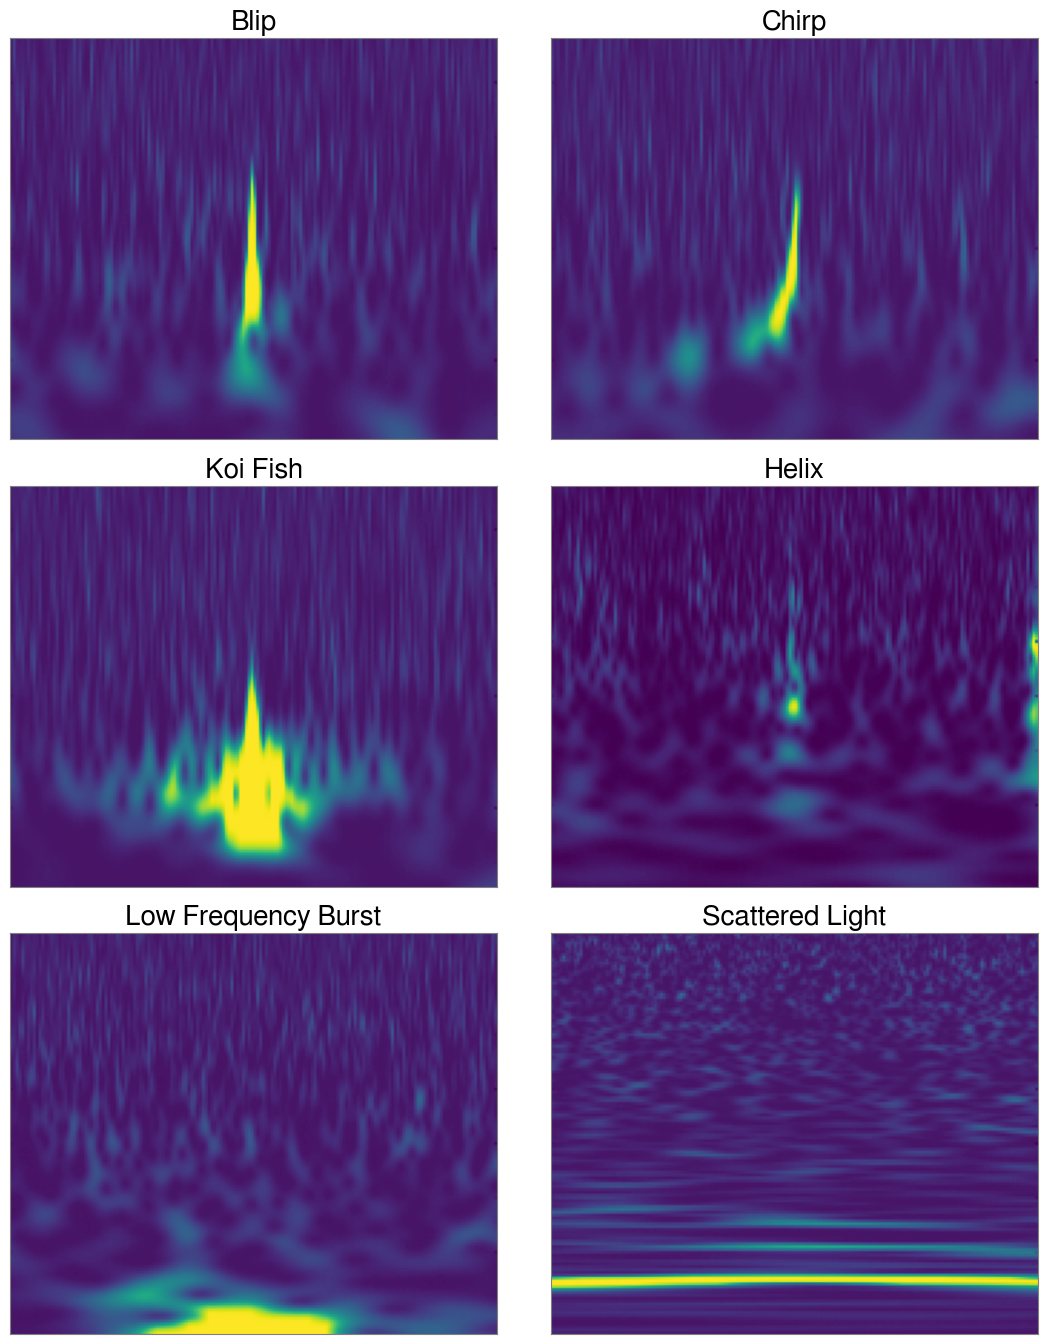

In [43]:
classes = ["Blip", "Chirp", "Koi_Fish", "Helix", "Low_Frequency_Burst", "Scattered_Light"]
gls = []
gl_im = []
for cl in classes:
    gls.append(dataset[dataset["label"]==cl].iloc[0])



with h5py.File(DATASET_PATH, 'r') as file:
    print("Keys: %s" % file.keys())
    a_group_key = list(file.keys())[0]
     
    # Getting the data
    data = list(file[a_group_key])
    for gl in gls:
        test = file[gl["label"]][gl["sample_type"]]
        gl_im.append(np.array(test[gl["gravityspy_id"]]["1.0.png"][:]))

fig, axs = plt.subplots(3,2, figsize=(14*0.8,17*0.8))

axss = axs.flatten()
for i, gl in enumerate(gl_im):
    axss[i].imshow(gl.squeeze())
    axss[i].set_title(gls[i]["label"].replace("_"," "), fontsize=20)
    axss[i].set_xticks([])
    axss[i].set_yticks([])

plt.tight_layout()
# plt.savefig('/home/gui/OneDrive/Mathematics/TFG/Latex/Figs/glitches_classes.png')

In [55]:
dataset_1 = pd.read_csv(DATA / "trainingset_v1d1_metadata.csv")
blip_gps = dataset_1[dataset_1["label"]=="Blip"].iloc[0]["event_time"]
time_window = 512
hdata = TimeSeries.fetch_open_data('H1', int(blip_gps)-time_window, int(blip_gps)+time_window)
print(hdata)

(1131949939.28369, 1131949939.78369)

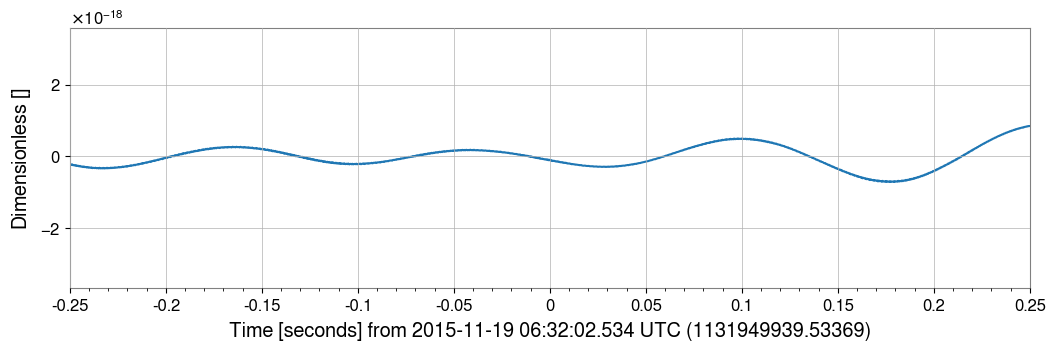

In [77]:
plot = hdata.plot()

ax = plot.gca()
ax.set_epoch(blip_gps)
ax.set_xlim(blip_gps-0.25, blip_gps+0.25)

(1131949939.28369, 1131949939.78369)

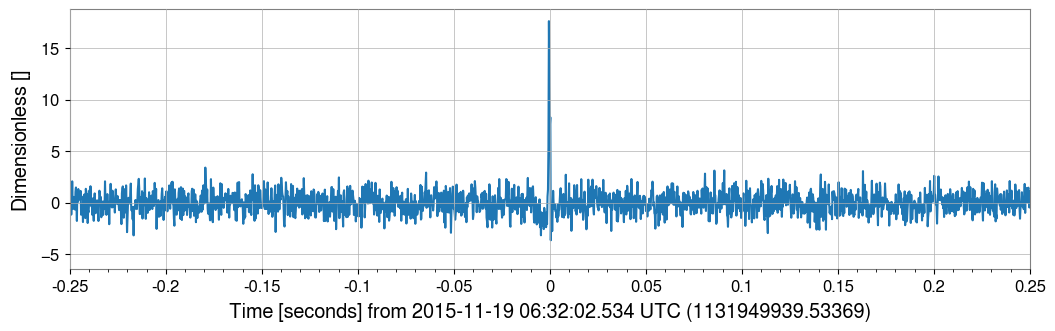

In [37]:
hwdata = hdata.whiten()
plot = hwdata.plot()

ax = plot.gca()
ax.set_epoch(blip_gps)
ax.set_xlim(blip_gps-0.25, blip_gps+0.25)

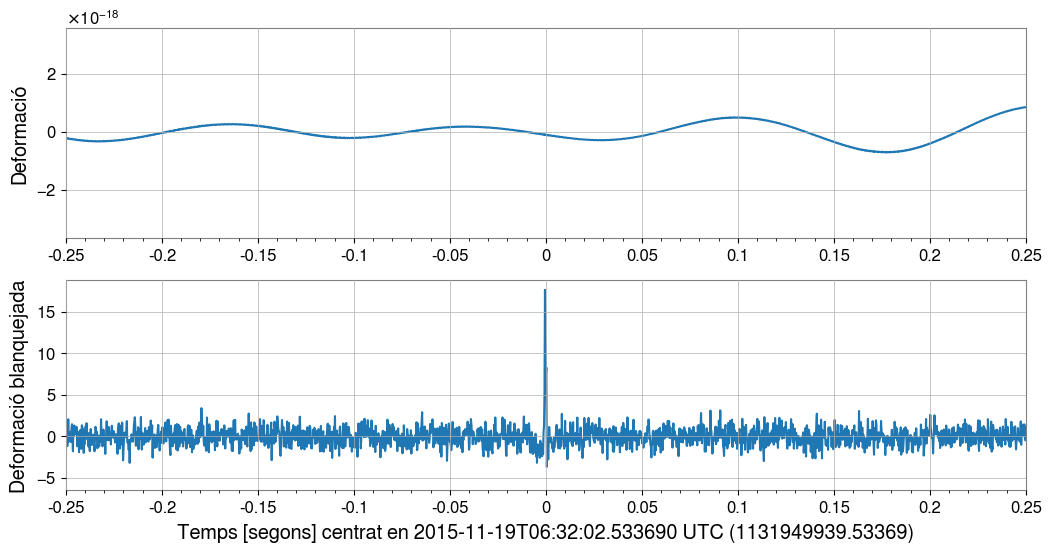

In [41]:
from gwpy.plot import Plot
plot = Plot(hdata, hwdata, figsize=(12, 6), separate=True, sharex=True)
ax = plot.gca()
ax.set_epoch(blip_gps)
ax.set_xlim(blip_gps-0.25, blip_gps+0.25)
ax.set_xlabel('Temps [segons] centrat en ' + from_gps(blip_gps).isoformat(timespec='microseconds') + f' UTC ({blip_gps})')
axs = plot.get_axes()
axs[0].set_ylabel('Deformació')
axs[1].set_ylabel('Deformació blanquejada')
plt.savefig('/home/gui/OneDrive/Mathematics/TFG/Latex/Figs/blip_strain.png')

# FFT

/home/gui/miniconda3/envs/GW/lib/python3.12/site-packages/gwpy/plot/plot.py:287: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  super().show(warn=warn)


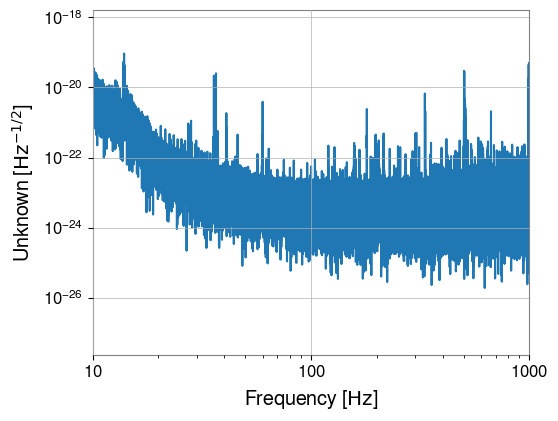

In [133]:
hasd = hdata.asd()
plot = hasd.plot()

ax = plot.gca()
ax.set_xlim(10, 1000)
plot.show()

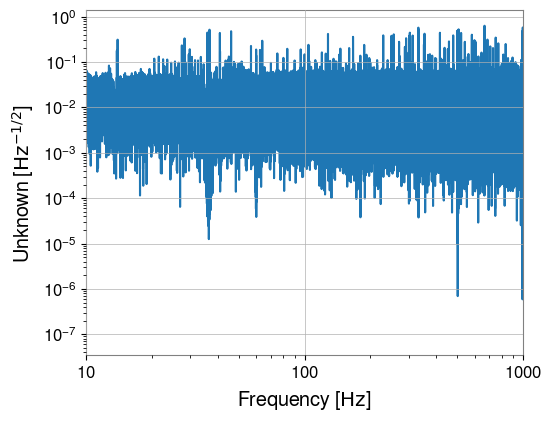

In [126]:
hasd = hwdata.asd()
plot = hasd.plot()

ax = plot.gca()
ax.set_xlim(10, 1000)
plot.show()

/home/gui/miniconda3/envs/GW/lib/python3.12/site-packages/gwpy/plot/plot.py:287: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  super().show(warn=warn)


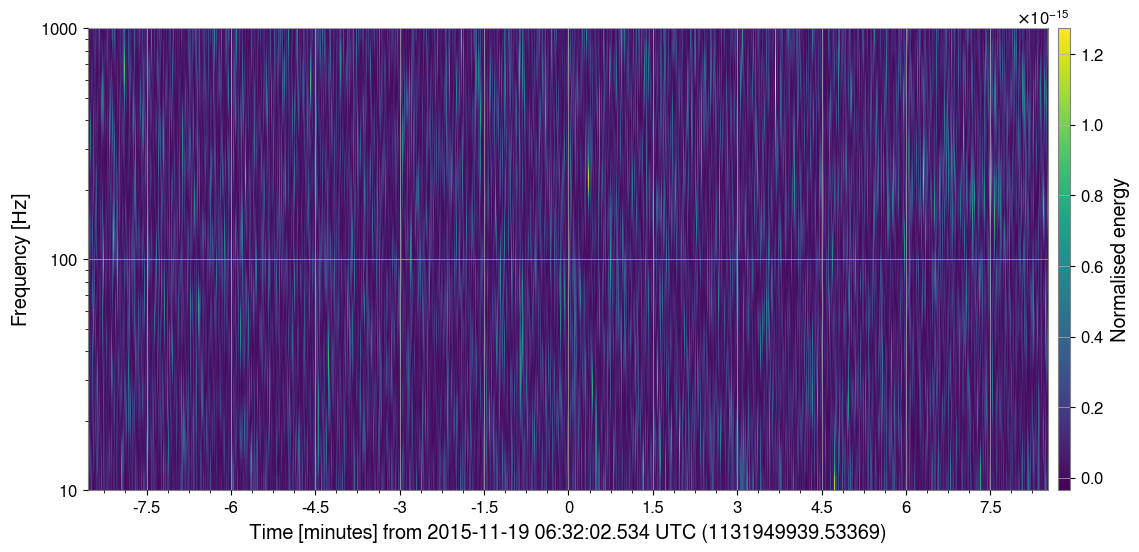

In [129]:
q = hwdata.q_transform(frange=(10, 1000), whiten=False, norm=False)
plot = q.plot()
ax = plot.gca()
ax.set_epoch(blip_gps)
ax.set_yscale('log')
ax.colorbar(label="Normalised energy")
plot.show()


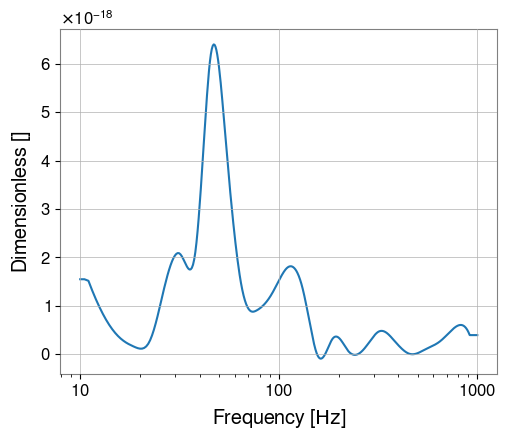

In [131]:
plot = q[0].plot()
plot.show()

# Spectrograms

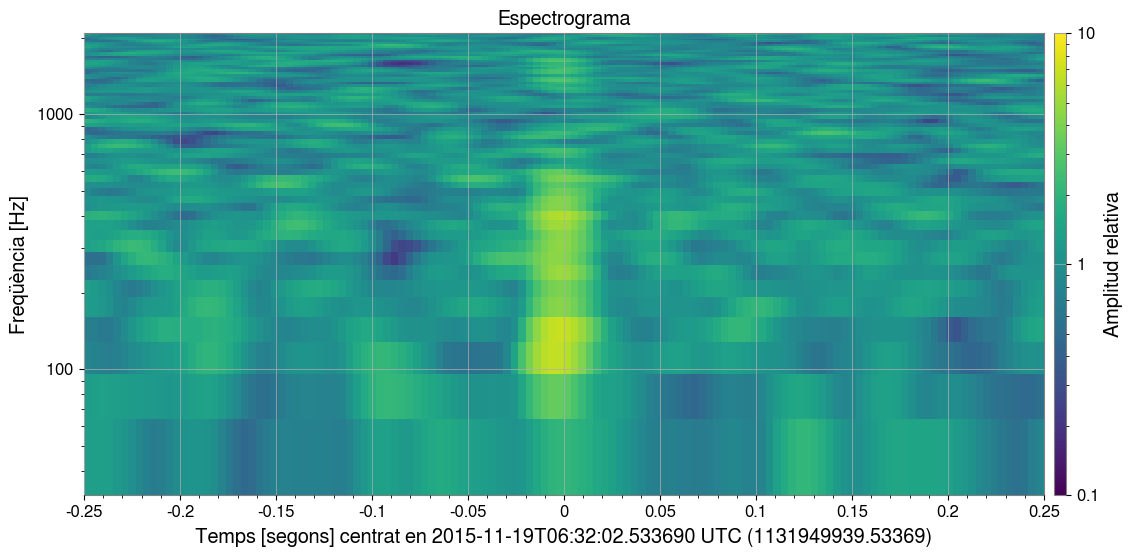

In [54]:
hp = hdata.crop(blip_gps-7, blip_gps+7).highpass(20)

white = hp.whiten(4, 2).crop(blip_gps-5, blip_gps+5)

specgram = white.spectrogram2(fftlength=1/32., overlap=7/256.) ** (1/2.)

specgram = specgram.crop_frequencies(20)  # drop everything below highpass

specgram = specgram.ratio('median')

plot = specgram.plot(norm='log', cmap='viridis', yscale='log')
ax = plot.gca()
ax.set_title('Espectrograma')
ax.set_xlim(blip_gps-0.25, blip_gps+0.25)
ax.set_epoch(blip_gps)
ax.colorbar(label='Amplitud relativa', clim=[0.1, 10])

ax.set_ylabel('Freqüència [Hz]')
ax.set_yscale('log')
ax.set_xlabel('Temps [segons] centrat en ' + from_gps(blip_gps).isoformat(timespec='microseconds') + f' UTC ({blip_gps})')

plot.show()
plt.savefig('/home/gui/OneDrive/Mathematics/TFG/Latex/Figs/blip_specgram.png')

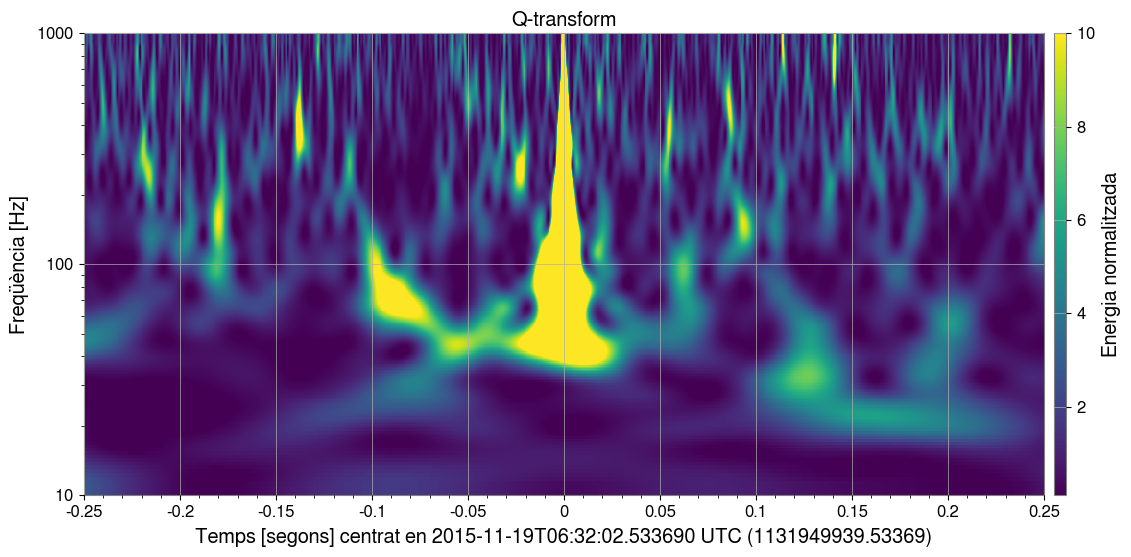

In [56]:
#-- Use OUTSEG for small time range
hq2 = hdata.q_transform(frange=(10, 1000), outseg=(blip_gps-0.25,blip_gps+0.25)) 
plot = hq2.plot()

ax = plot.gca()
ax.set_epoch(blip_gps)
ax.set_yscale('log')
ax.set_title('Q-transform')
ax.set_ylabel('Freqüència [Hz]')
ax.set_xlabel('Temps [segons] centrat en ' + from_gps(blip_gps).isoformat(timespec='microseconds') + f' UTC ({blip_gps})')
ax.colorbar(label="Energia normalitzada", clim=[0.1, 10])
plt.savefig('/home/gui/OneDrive/Mathematics/TFG/Latex/Figs/blip_qtransform.png')